In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('Weather Data.csv')

In [3]:
data.head()

,Date/Time,temp,dew_temp,humidity,wind_speed,Visibility_km,Press_kPa,Weather,target
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,cloudy,0
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,cloudy,0
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,rain,1
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,rain,1
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,cloudy,0


In [4]:
data['target'] = data['Weather'].apply(lambda x : 1 if x=='rain' else 0)

In [5]:
data.head()

,Date/Time,temp,dew_temp,humidity,wind_speed,Visibility_km,Press_kPa,Weather,target
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,cloudy,0
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,cloudy,0
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,rain,1
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,rain,1
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,cloudy,0


In [6]:
data.to_csv("weather_data.csv")

In [7]:
data = pd.read_csv('Weather Data.csv')

In [8]:
data.head()

,Date/Time,temp,dew_temp,humidity,wind_speed,Visibility_km,Press_kPa,Weather,target
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,cloudy,0
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,cloudy,0
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,rain,1
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,rain,1
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,cloudy,0


In [9]:
data.describe()

,temp,dew_temp,humidity,wind_speed,Visibility_km,Press_kPa,target
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,0.098702
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,0.298279
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,0.000000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,0.000000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,0.000000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,0.000000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000,1.000000


In [10]:
data['Weather'].value_counts()

Weather
cloudy    3963
clear     3432
rain       867
snow       522
Name: count, dtype: int64

In [11]:
data.replace({"Weather":{'cloudy':0 , 'clear':1,'rain':2,'snow':3}},inplace = True)

In [12]:
data['target'].value_counts()

target
0    7917
1     867
Name: count, dtype: int64

In [13]:
value_0_counts,value_1_counts = data.target.value_counts()
df_value_0 = data[data['target'] == 0]
df_value_1 = data[data['target'] == 1]


In [14]:
df_value_1.shape

(867, 9)

In [15]:
df_class_1_over = df_value_1.sample(value_0_counts,replace=True)
df_class_1_over.shape

(7917, 9)

In [16]:
df_value_0.shape

(7917, 9)

In [17]:
data_head = pd.concat([df_value_0,df_class_1_over])

In [18]:
data_head.shape

(15834, 9)

In [19]:
x = data.drop(columns = ['Date/Time','target'],axis =1)
y = data['target']

In [22]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 2)

In [23]:
x.shape,x_train.shape,x_test.shape

((8784, 7), (6148, 7), (2636, 7))

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

In [25]:
x = np.asarray(x)
y = np.asarray(y)

In [ ]:
x

In [ ]:
y

In [26]:
models = [LogisticRegression(max_iter = 1000),SVC(kernel = 'linear'),KNeighborsClassifier(),RandomForestClassifier(random_state = 0),XGBRegressor()]

In [27]:
def compare_cv():
    for model in models:
        cv_score = cross_val_score(model,x,y,cv = 5)
        mean_ac = sum(cv_score)/len(cv_score)
        mean_ac_per = mean_ac * 100
        mean_ac_r = round(mean_ac_per,2)
        print("Cross validation score of ",model,"is", cv_score)
        print("Accuracy in percentage: ",model,"is : ",mean_ac_r,"%")
        print("------------------------------------------------------")

In [28]:
compare_cv()

Cross validation score of  LogisticRegression(max_iter=1000) is [0.81616392 0.93682413 0.96471258 0.97552647 0.88895216]
Accuracy in percentage:  LogisticRegression(max_iter=1000) is :  91.64 %
------------------------------------------------------
Cross validation score of  SVC(kernel='linear') is [0.81388731 0.93853159 0.96072851 0.96528173 0.90148064]
Accuracy in percentage:  SVC(kernel='linear') is :  91.6 %
------------------------------------------------------
Cross validation score of  KNeighborsClassifier() is [0.91405805 0.91576551 0.9123506  0.92031873 0.9094533 ]
Accuracy in percentage:  KNeighborsClassifier() is :  91.44 %
------------------------------------------------------
Cross validation score of  RandomForestClassifier(random_state=0) is [1. 1. 1. 1. 1.]
Accuracy in percentage:  RandomForestClassifier(random_state=0) is :  100.0 %
------------------------------------------------------
Cross validation score of  XGBRegressor(base_score=None, booster=None, callbacks=No

In [29]:
#XGBRegressor 
model = XGBRegressor()

In [30]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [34]:
from sklearn.metrics import r2_score

In [35]:
train_data_prediction = model.predict(x_train)
r2_score_train = r2_score(y_train,train_data_prediction)

In [36]:
print(r2_score_train)

0.9999999978288611


In [37]:
test_data_prediction = model.predict(x_test)
r2_score_test = r2_score(y_test,test_data_prediction)
print("R2 score for the test data : ",r2_score_test)

R2 score for the test data :  0.9999999978286357


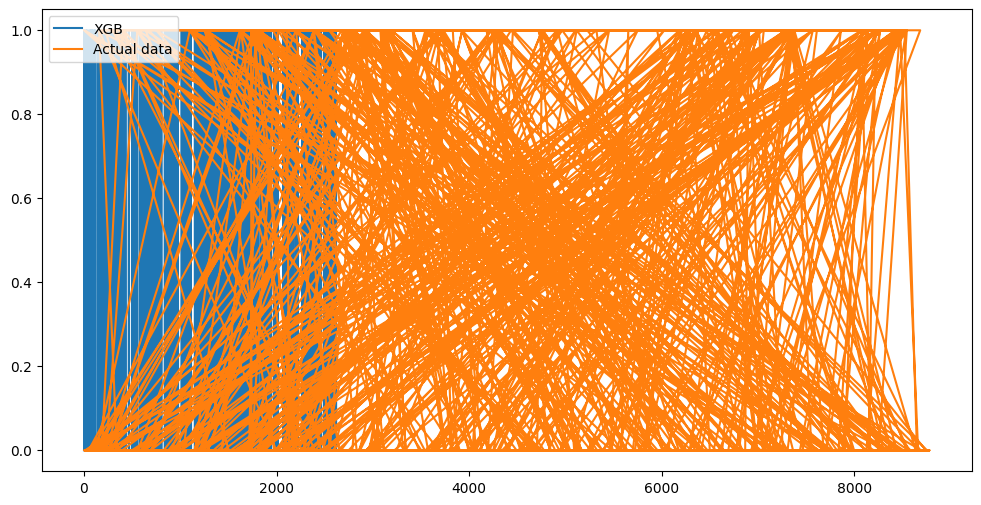

In [40]:
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(test_data_prediction,label="XGB")
plt.plot(y_test,label = "Actual data")
plt.legend(loc="upper left")
plt.show()

In [66]:
#make a predictive model 
input_data = [55,85,55,1,24.1,45.34,1]
input_data_as_array = np.asarray(input_data)
input_data_reshape = input_data_as_array.reshape(1,-1)
#prediction 
predict = model.predict(input_data_reshape)
print(predict)
if predict < 0.5:
    print("There is no chance to CloudBurst")
else:
    print("There is a chance of cloudBurst")

[4.583405e-06]
There is no chance to CloudBurst


In [ ]:
# label encoder  
'cloudy':0 , 'clear':1,'rain':2,'snow':3 
inputs are as follows : 
    temp,dew_temp,humidity,wind_speed,Visibility_km,Press_kPa,Weather 
    
output is t